In [1]:
#import dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Read in csv
loan_data = pd.read_csv("/Users/jessmroczek/Documents/DA_Bootcamp/Homework%20Files/HW_Repositories/loan_approval_project_4/loan_approval_data.csv")

In [2]:
#Review the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.shape

(614, 13)

In [4]:
# Dropping Loan_ID column 
#As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.
loan_data.drop(['Loan_ID'],axis=1,inplace=True)

In [5]:
loan_data.shape

(614, 12)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Addressing Missing Values 
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Drop rows with null values
loan_data.dropna(inplace=True)

# Check the shape of the DataFrame after dropping rows
print("Shape after dropping rows with null values:", loan_data.shape)

Shape after dropping rows with null values: (480, 12)


In [10]:
# Create a new column called 'combined_income' by adding 'ApplicantIncome' and 'CoapplicantIncome'
loan_data['combined_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

# Check the first few rows to verify
print(loan_data[['ApplicantIncome', 'CoapplicantIncome', 'combined_income']].head())


   ApplicantIncome  CoapplicantIncome  combined_income
1             4583             1508.0           6091.0
2             3000                0.0           3000.0
3             2583             2358.0           4941.0
4             6000                0.0           6000.0
5             5417             4196.0           9613.0


In [11]:
#Check cols
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,combined_income
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [12]:
loan_data['Coapplicant'] = loan_data['CoapplicantIncome'] != 0

#Check cols
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,combined_income,Coapplicant
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,False
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,True
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,True


In [13]:
#Remove those columns as they are no longer needed.
loan_data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

# Check the DataFrame after dropping columns
print(loan_data.head())

  Gender Married Dependents     Education Self_Employed  LoanAmount  \
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   
5   Male     Yes          2      Graduate           Yes       267.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  \
1             360.0             1.0         Rural           N   
2             360.0             1.0         Urban           Y   
3             360.0             1.0         Urban           Y   
4             360.0             1.0         Urban           Y   
5             360.0             1.0         Urban           Y   

   combined_income  Coapplicant  
1           6091.0         True  
2           3000.0        False  
3           4941.0         True  
4           6000.0        False  
5           

In [14]:
# Plot your data to see what's in your DataFrame
loan_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_73062/3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_73062/3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_73062/3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_73062/3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_73062/3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation

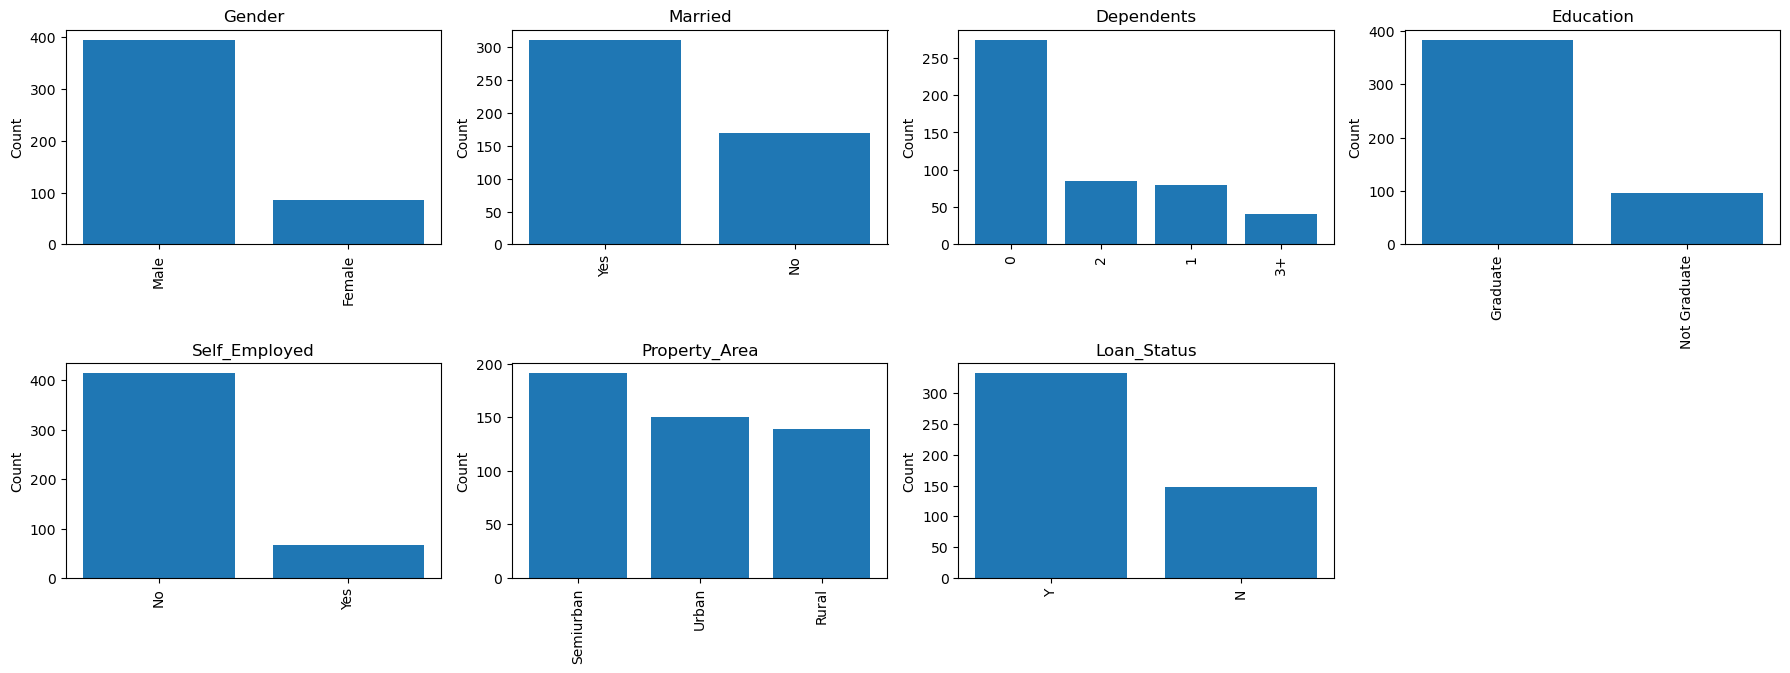

In [15]:
# Setting up the figure
obj = (loan_data.dtypes == 'object')
fig = plt.figure(figsize=(18, 36))
object_cols = list(obj[obj].index)

# Loop through each column
index = 1
for col in object_cols:
    # Get the value counts
    y = loan_data[col].value_counts()
    
    # Create subplot
    ax = fig.add_subplot(11, 4, index)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(y.index, rotation=90)
    
    # Create bar plot using matplotlib
    ax.bar(y.index, y)
    
    # Increment index
    index += 1
    
    # Add label to the subplot
    ax.set_title(col)
    
    # Add y-axis label
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

In [16]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column with categorical data
for col in loan_data.select_dtypes(include='object').columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Check the updated DataFrame
print(loan_data.head())

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          0              0       128.0   
2       1        1           0          0              1        66.0   
3       1        1           0          1              0       120.0   
4       1        0           0          0              0       141.0   
5       1        1           2          0              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
1             360.0             1.0              0            0   
2             360.0             1.0              2            1   
3             360.0             1.0              2            1   
4             360.0             1.0              2            1   
5             360.0             1.0              2            1   

   combined_income  Coapplicant  
1           6091.0         True  
2           3000.0        False  
3           4941.0         True  
4           6000.0        Fa

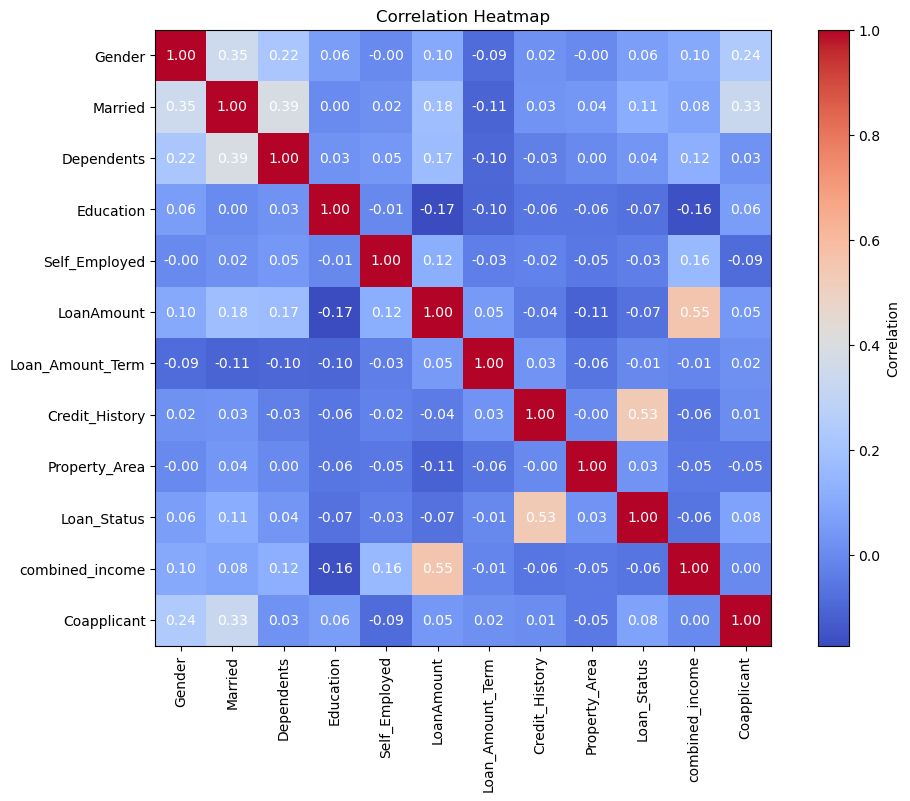

In [17]:
# Compute the correlation matrix
correlation_matrix = loan_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add numerical values to each square
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(heatmap, label='Correlation')
plt.title('Correlation Heatmap')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.show()

In [18]:
# Create a new column 'income_loan_ratio' to hold the ratio of 'combined_income' over 'LoanAmount'
loan_data['income_loan_ratio'] = loan_data['combined_income'] / loan_data['LoanAmount']

# Check the first few rows to verify
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,combined_income,Coapplicant,income_loan_ratio
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0,True,47.585938
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0,False,45.454545
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0,True,41.175000
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0,False,42.553191
5,1,1,2,0,1,267.0,360.0,1.0,2,1,9613.0,True,36.003745


In [19]:
#Check Types of data
loan_data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
combined_income      float64
Coapplicant             bool
income_loan_ratio    float64
dtype: object

In [20]:
## Convert boolean values to numeric (0 for False, 1 for True)
loan_data['Coapplicant'] = loan_data['Coapplicant'].astype(int)

# Check the DataFrame after conversion
print(loan_data.head())

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          0              0       128.0   
2       1        1           0          0              1        66.0   
3       1        1           0          1              0       120.0   
4       1        0           0          0              0       141.0   
5       1        1           2          0              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
1             360.0             1.0              0            0   
2             360.0             1.0              2            1   
3             360.0             1.0              2            1   
4             360.0             1.0              2            1   
5             360.0             1.0              2            1   

   combined_income  Coapplicant  income_loan_ratio  
1           6091.0            1          47.585938  
2           3000.0            0          45.454545  
3    

In [22]:
# Divide the dataset into features (X) and target variable (Y)
X = loan_data.drop(['Loan_Status'], axis=1)
Y = loan_data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)


In [23]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Logistic Regression
LR = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
LR.fit(X_train_scaled, Y_train)
Y_predict = LR.predict(X_test_scaled)

# Evaluate the model
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        59
           1       0.80      0.98      0.88       133

    accuracy                           0.81       192
   macro avg       0.85      0.71      0.73       192
weighted avg       0.83      0.81      0.79       192



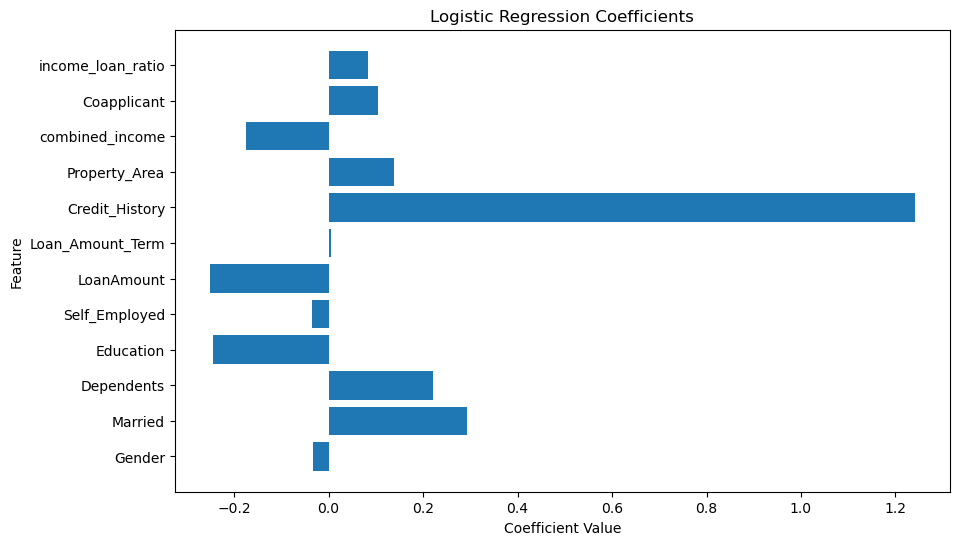

In [25]:
# Get the coefficients and feature names
coefficients = LR.coef_[0]
feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

The above horizontal bar chart shows the coefficients of each feature in the logistic regression model. Positive coefficients indicate features that positively contribute to the prediction of the target variable, while negative coefficients indicate features that negatively contribute to the prediction.

Dropping variables

In [26]:
# Remove the 'Married' variable from the features
X_drop_married = X.drop(['Married'], axis=1)


In [27]:
# Split the data into training and testing sets
X_train_drop_married, X_test_drop_married, Y_train, Y_test = train_test_split(X_drop_married, Y, test_size=0.4, random_state=1)


In [28]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_drop_married_scaled = scaler.fit_transform(X_train_drop_married)
X_test_drop_married_scaled = scaler.transform(X_test_drop_married)


In [29]:
# Logistic Regression without the 'Married' variable
LR_drop_married = LogisticRegression(max_iter=1000)
LR_drop_married.fit(X_train_drop_married_scaled, Y_train)
Y_predict_drop_married = LR_drop_married.predict(X_test_drop_married_scaled)


In [30]:
# Evaluate the model
print(classification_report(Y_test, Y_predict_drop_married))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        59
           1       0.80      0.98      0.88       133

    accuracy                           0.81       192
   macro avg       0.85      0.71      0.73       192
weighted avg       0.83      0.81      0.79       192



In [31]:
# Remove the 'Credit_History' variable from the features
X_drop_credit_history = X.drop(['Credit_History'], axis=1)

# Split the data into training and testing sets
X_train_drop_credit_history, X_test_drop_credit_history, Y_train, Y_test = train_test_split(X_drop_credit_history, Y, test_size=0.4, random_state=1)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_drop_credit_history_scaled = scaler.fit_transform(X_train_drop_credit_history)
X_test_drop_credit_history_scaled = scaler.transform(X_test_drop_credit_history)

# Logistic Regression without the 'Credit_History' variable
LR_drop_credit_history = LogisticRegression(max_iter=1000)
LR_drop_credit_history.fit(X_train_drop_credit_history_scaled, Y_train)
Y_predict_drop_credit_history = LR_drop_credit_history.predict(X_test_drop_credit_history_scaled)

# Evaluate the model
print(classification_report(Y_test, Y_predict_drop_credit_history))

              precision    recall  f1-score   support

           0       0.45      0.15      0.23        59
           1       0.71      0.92      0.80       133

    accuracy                           0.68       192
   macro avg       0.58      0.53      0.51       192
weighted avg       0.63      0.68      0.62       192

